<a href="https://colab.research.google.com/github/ChristophWuersch/AppliedNeuralNetworks/blob/main/U01/WoodsMammography-keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Bilder/ost_logo.png" width="240" height="120" align="right"/>
<div style="text-align: left"> <b> Applied Neural Networks | FS 2022 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> © Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>


# Ein neuronales Netz zur Klassifizierung von Brustkrebs 
### (Woods Mammography Dataset)

Source: https://machinelearningmastery.com/develop-a-neural-network-for-woods-mammography-dataset/

In dieser Übungsaufgabe erfahren Sie, wie Sie ein neuronales Mehrschicht-Perceptron-Netzwerkmodell für den Wood's Mammographie-Klassifizierungsdatensatz entwickeln.

Nach erfolgreichem Abschluss dieser Übungsaufgabe werden Sie wissen:

- Wie man den Wood's Mammography-Datensatz lädt und zusammenfasst und die Ergebnisse nutzt, um Vorschläge für die Datenaufbereitung und die zu verwendenden Modellkonfigurationen zu machen.
- Wie man die Lerndynamik von einfachen MLP-Modellen auf dem Datensatz untersucht.
- Wie man robuste Schätzungen der Modellleistung entwickelt, die Modellleistung abstimmt und Vorhersagen für neue Daten macht.

In [5]:
# k-fold cross-validation of base model for the mammography dataset
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


## (a) Laden des Datensatzes

Der Datensatz geht auf Kevin Woods et al. und die 1993 veröffentlichte Arbeit mit dem Titel [Comparative Evaluation Of Pattern Recognition Techniques For Detection Of Microcalcifications In Mammography](https://www.worldscientific.com/doi/abs/10.1142/S0218001493000698) zurück.


In [7]:
# load the dataset

#df = pd.read_csv('mammography.csv', header=None)
df=pd.read_csv('https://raw.githubusercontent.com/ChristophWuersch/AppliedNeuralNetworks/master/U01/mammography.csv', header=None)

#infoFile='mammography.names'

df.head()

,0,1,2,3,4,5,6
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


## (b) Plotten von Histogrammen

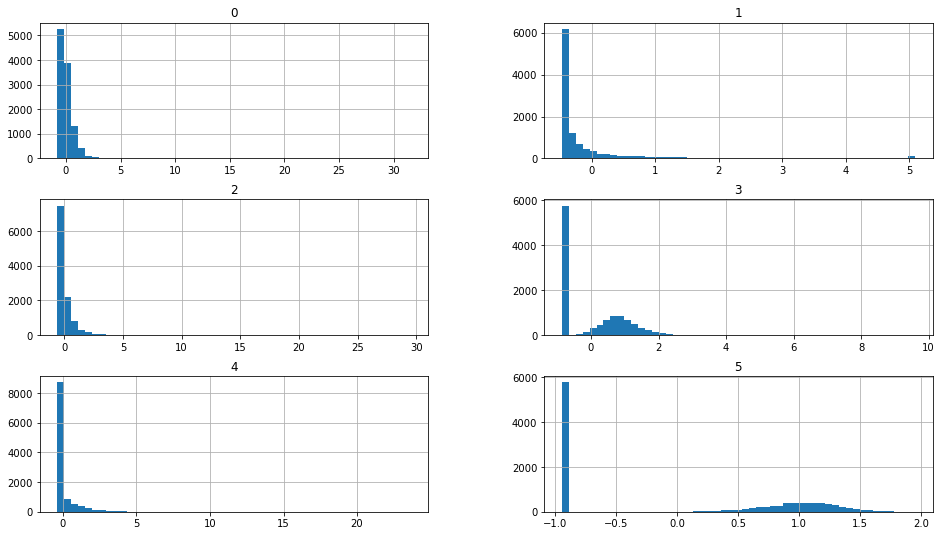

In [3]:
%matplotlib inline
df.hist(bins=51,figsize=(16,9));

- Es ist zu erkennen, dass die meisten Variablen vielleicht eine Exponentialverteilung haben, und vielleicht ist Variable 5 (die letzte Eingabevariable) normalverteilt mit einigen Ausreissern/fehlenden Werten.
- Es könnte von Vorteil sein, eine *Potenztransformation* (`PowerTransformer`) auf jede Variable anzuwenden, um die Wahrscheinlichkeitsverteilung weniger schief zu machen, was die Leistung des Modells wahrscheinlich verbessern wird.

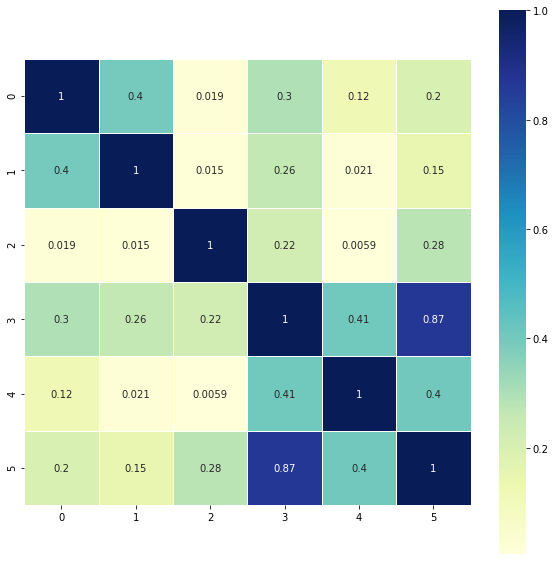

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))   

sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap="YlGnBu",square=True, ax=ax);

## (c) Aufteilen in Trainings- und Validierungsdaten

In [41]:
# split into input and output columns

le=LabelEncoder()

X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = le.fit_transform(y)


In [22]:
#determine the number of input features
n_features = X.shape[1]
print('Input Features: %i' % (n_features))

Input Features: 6


In [23]:
from sklearn.model_selection import train_test_split
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

## (d) Modell erstellen und kompilieren


In [34]:
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## (e) Modell trainieren und Lernkurven darstellen

In [35]:

# fit the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0, 
                    validation_data=(X_test,y_test))
# predict test set
#yhat = model.predict_classes(X_test)
yhat = (model.predict(X_test) > 0.5).astype("int32")
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.988


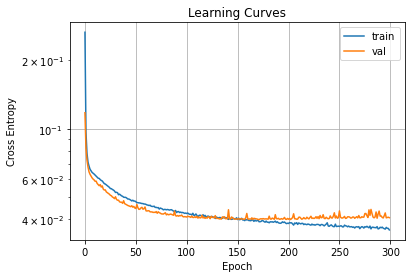

In [36]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='val')
plt.legend(); plt.grid(True)
plt.show()

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

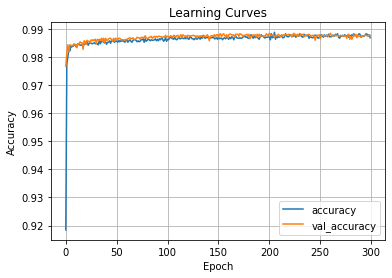

In [39]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(); plt.grid(True)
plt.show()

## (f) Robuste Model-Bewertung mit der k-fachen Kreuzvalidierung

Das Verfahren der k-fachen Kreuzvalidierung kann eine zuverlässigere Schätzung der MLP-Leistung liefern, obwohl es sehr langsam sein kann.

Dies liegt daran, dass $k$ Modelle angepasst und bewertet werden müssen. Dies ist kein Problem, wenn der Datensatz klein ist. 
Wir können die Klasse `StratifiedKFold` verwenden und jeden Fold manuell aufzählen, das Modell anpassen, es auswerten und dann am Ende des Verfahrens den Mittelwert der Auswertungsergebnisse angeben.

In [18]:
# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()

In [19]:
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# fit the model
	model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)
	# predict test set
	yhat = (model.predict(X_test) > 0.5).astype("int32")
	#yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

>0.988
>0.983
>0.990
>0.989
>0.984
>0.993
>0.995
>0.989
>0.987
>0.993
Mean Accuracy: 0.989 (0.004)


Hinweis: Ihre Ergebnisse können aufgrund der stochastischen Natur des Algorithmus oder des Bewertungsverfahrens oder aufgrund von Unterschieden in der numerischen Präzision variieren. Führen Sie das Beispiel ein paar Mal aus und vergleichen Sie das durchschnittliche Ergebnis.

In diesem Fall können wir sehen, dass das MLP-Modell eine mittlere Genauigkeit von etwa 98,7 Prozent erreicht, was unserer groben Schätzung aus dem vorherigen Abschnitt ziemlich nahe kommt.

Dies bestätigt unsere Erwartung, dass die Basismodellkonfiguration für diesen Datensatz besser funktionieren könnte als ein naives Modell.

## (h) Endgültiges Modell und Vorhersagen machen

Sobald wir uns für eine Modellkonfiguration entschieden haben, können wir ein endgültiges Modell auf allen verfügbaren Daten trainieren und es verwenden, um Vorhersagen für neue Daten zu treffen.

In diesem Fall verwenden wir das Modell mit Dropout und einer kleinen Losgröße als endgültiges Modell.

Wir können die Daten vorbereiten und das Modell wie zuvor anpassen, allerdings mit dem gesamten Datensatz anstelle einer Trainingsuntermenge des Datensatzes.

In [40]:
# fit a final model and make predictions on new data for the mammography dataset

# define a row of new data
row = [0.23001961,5.0725783,-0.27606055,0.83244412,-0.37786573,0.4803223]
# make prediction
yhat = model.predict_classes([row])
# invert transform to get label for class
yhat = le.inverse_transform(yhat)
# report prediction
print('Predicted: %s' % (yhat[0]))

Predicted: '-1'


D:\Users\christoph.wuersch\Anaconda3\envs\ANN\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
